In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Importing important libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.model_selection import train_test_split
# import nlp
from gensim.models import Word2Vec

#For emojis
!pip install spacymoji
import spacy
from spacymoji import Emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Reading csv file into dataframe
reviews = pd.read_csv("/content/drive/MyDrive/SMM project/updated_mobile_reviews_lang_new.csv",index_col=False)

<ipython-input-3-0e0eebc10121>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv("/content/drive/MyDrive/SMM project/updated_mobile_reviews_lang_new.csv",index_col=False)


In [ ]:
reviews.shape

(82816, 11)

In [ ]:
reviews.head()

,Unnamed: 0,asin,name,rating,date,verified,title,title_lang,body,body_lang,helpfulVotes
0,0.0,B0000SX2UC,Janet,3.0,"October 11, 2005",False,"Def not best, but not worst",en,I had the Samsung A600 for awhile which is abs...,en,1.0
1,1.0,B0000SX2UC,Luke Wyatt,1.0,"January 7, 2004",False,Text Messaging Doesn't Work,en,Due to a software issue between Nokia and Spri...,en,17.0
2,2.0,B0000SX2UC,Brooke,5.0,"December 30, 2003",False,Love This Phone,en,"This is a great, reliable phone. I also purcha...",en,5.0
3,3.0,B0000SX2UC,amy m. teague,3.0,"March 18, 2004",False,"Love the Phone, BUT...!",en,"I love the phone and all, because I really did...",en,1.0
4,4.0,B0000SX2UC,tristazbimmer,4.0,"August 28, 2005",False,"Great phone service and options, lousy case!",en,The phone has been great for every purpose it ...,en,1.0


In [ ]:
# Selecting only those reviews that have either the title or body or both in english language
reviews = reviews[(reviews['title_lang'] == 'en') | (reviews['body_lang'] == 'en')]
reviews.shape

(80033, 11)

In [ ]:
reviews.columns

Index(['Unnamed: 0', 'asin', 'name', 'rating', 'date', 'verified', 'title',
       'title_lang', 'body', 'body_lang', 'helpfulVotes'],
      dtype='object')

In [ ]:
#Removing columns that are not required:
reviews = reviews.drop(columns=['Unnamed: 0', 'asin', 'name', 'date', 'verified', 'helpfulVotes'])
reviews.columns

Index(['rating', 'title', 'title_lang', 'body', 'body_lang'], dtype='object')

In [ ]:
# Checking for NaN
reviews.isnull().values.any()

True

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80033 entries, 0 to 82815
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      80032 non-null  float64
 1   title       80022 non-null  object 
 2   title_lang  80033 non-null  object 
 3   body        80012 non-null  object 
 4   body_lang   80033 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.7+ MB


Getting all the rows that have atleast 1 NaN to observe and take a decision on what to do with them

In [ ]:
reviews[reviews['rating'].isnull()]

,rating,title,title_lang,body,body_lang
82815,NaN,NaN,en,NaN,en


In [ ]:
reviews[reviews['title'].isnull()]

,rating,title,title_lang,body,body_lang
27707,1.0,NaN,en,Battery doesn't work as new one...,en
45093,5.0,NaN,en,Almost like pretty new,en
46648,5.0,NaN,en,Love this phone. Everything's worked great. So...,en
63737,5.0,NaN,en,"I get that phone I needed ,, thanks .",en
64792,5.0,NaN,en,Love the phone,en
65788,5.0,NaN,en,Great phone,en
68747,5.0,NaN,en,Great phone...A++,en
78216,5.0,NaN,en,It was s good purchase,en
79129,5.0,NaN,en,Good value for price!,en
80337,5.0,NaN,en,It was okay no dislikes yet,en


In [ ]:
reviews[reviews['body'].isnull()]

,rating,title,title_lang,body,body_lang
9840,3.0,Three Stars,en,NaN,en
19026,4.0,Four Stars,en,NaN,en
21385,5.0,Nice and fast shipment,en,NaN,en
21394,1.0,Damaged,en,NaN,en
23640,2.0,The Wrong Phone Color,en,NaN,en
24644,1.0,One Star,en,NaN,en
26433,2.0,The Wrong Phone Color,en,NaN,en
28359,1.0,DON'T BUY FROM CLEAN ELECTRIC!!!!!,en,NaN,en
28605,1.0,I regret this purchase!,en,NaN,en
39664,5.0,Hi,en,NaN,en


In [ ]:
# Replacing NaN values of title with empty string
reviews[['title','body' ]] = reviews[['title','body' ]].fillna('')
# Removing rows that don't have any rating
reviews =reviews.dropna(subset=['rating'])

In [ ]:
# Checking for NaN
reviews.isnull().values.any()

False

In [ ]:
# Create quick lambda functions to find the polarity of each review based on rating
# 4.0-5.0 : Postive
# 3.0 : Neutral
# 1.0-2.0 : Negative

reviews["sentiment"] = reviews["rating"].apply(lambda x: 'Positive' if x>3 else('Neutral' if x==3 else 'Negative'))

In [ ]:
reviews.head()

,rating,title,title_lang,body,body_lang,sentiment
0,3.0,"Def not best, but not worst",en,I had the Samsung A600 for awhile which is abs...,en,Neutral
1,1.0,Text Messaging Doesn't Work,en,Due to a software issue between Nokia and Spri...,en,Negative
2,5.0,Love This Phone,en,"This is a great, reliable phone. I also purcha...",en,Positive
3,3.0,"Love the Phone, BUT...!",en,"I love the phone and all, because I really did...",en,Neutral
4,4.0,"Great phone service and options, lousy case!",en,The phone has been great for every purpose it ...,en,Positive


In [ ]:
reviews.sentiment.value_counts()

Positive    53585
Negative    20796
Neutral      5651
Name: sentiment, dtype: int64

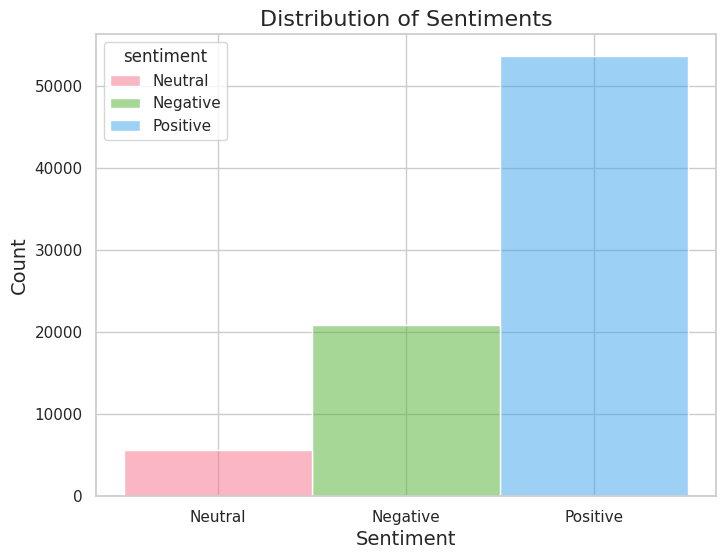

In [ ]:
# Sentiments distribution

# Create a histogram plot using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=reviews, x='sentiment', hue='sentiment', palette='husl')
ax.set_title('Distribution of Sentiments', fontsize=16)
ax.set_xlabel('Sentiment', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Show the plot
plt.show()

In [ ]:
# Define a function to lowercase all words in a text, except for uppercase words
def lowercase_all_except_uppercase(text):
    words = text.split()
    for i in range(len(words)):
        # Check if the word is not completely uppercase
        if not words[i].isupper():
            words[i] = words[i].lower()
    return ' '.join(words)

# Apply the function to 'title' and 'body' columns of the DataFrame
reviews['title'] = reviews['title'].apply(lowercase_all_except_uppercase)
reviews['body'] = reviews['body'].apply(lowercase_all_except_uppercase)

In [ ]:
#Check for duplicate reviews:
reviews[reviews.duplicated()]

,rating,title,title_lang,body,body_lang,sentiment
778,5.0,five stars,en,works great,en,Positive
830,5.0,five stars,en,works great,en,Positive
948,5.0,five stars,en,great,en,Positive
958,5.0,five stars,en,excellent,en,Positive
1166,5.0,five stars,en,good,en,Positive
...,...,...,...,...,...,...
82796,5.0,I,en,I loved it,en,Positive
82797,5.0,I like it.,en,best forever,en,Positive
82798,5.0,basically perfect and brand new (ignore the an...,en,I was a little bit scared of my purchase given...,en,Positive
82799,5.0,new phone for half price,en,I got a new phone for half the price!!! 100% b...,en,Positive


In [ ]:
reviews = reviews.drop_duplicates(subset=['title', 'body'], keep='first')

In [ ]:
reviews.shape

(72603, 6)

In [ ]:
reviews['title'].head(100)

0                      def not best, but not worst
1                      text messaging doesn't work
2                                  love this phone
3                          love the phone, BUT...!
4     great phone service and options, lousy case!
                          ...                     
95          samsung T301G prepaid phone (tracfone)
96     wow! A phone that doesn't double as a club!
97                           awesome little phone!
98           samsun T301G prepaid phone (tracfone)
99                                      works fine
Name: title, Length: 100, dtype: object

In [ ]:

from spacy.cli import download
download("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load("en_core_web_lg")
emoji = Emoji(nlp)
nlp.add_pipe("emoji", first=True)

nlp.pipe_names

['emoji',
 'tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [ ]:
def extract_emojies(x):
  doc = nlp(x) #with emojis
  emojis = [token.text for token in doc if token._.is_emoji]

  return emojis

emojies_df = reviews['title'].apply(extract_emojies)
emojies_df

0        []
1        []
2        []
3        []
4        []
         ..
82810    []
82811    []
82812    []
82813    []
82814    []
Name: title, Length: 72603, dtype: object

In [ ]:
reviews['emoji_detected'] = emojies_df

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

import advertools as adv
import emoji





In [ ]:

# Function to replace emojis with their word forms without the "_face" suffix using advertools
# def replace_emojis_with_words(text):
#     return adv.emoji_to_word(text, remove_face=True)
# Function to replace emojis with their word forms without the "_face" suffix


def replace_emojis_with_words(text):
    return emoji.demojize(text).replace('_', ' ')



reviews['title'] = reviews['title'].apply(replace_emojis_with_words)

reviews['body'] = reviews['body'].apply(replace_emojis_with_words)

In [ ]:
# Dictionary to map emojis to word forms
emoji_mapping = {'XD': 'laughing',
                 'LOL': 'laughing',
                 'ROFL': 'laughing',
                 ':-)': 'smiley',
                 ':)': 'smiley',
                 ':-(': 'sad',
                 ':(': 'sad',
                 ':D': 'laughing',
                 ':P': 'tongue_out',
                 ';)': 'wink',
                 ':|': 'neutral',
                 ':O': 'surprised',
                 ':*': 'kiss',
                 ':@': 'angry',
                 ':/': 'confused',
                 ':S': 'confused',
                 ':$': 'embarrassed',
                 ':|': 'straight_face',
                 '>:(': 'angry_face',
                 ':\\': 'skeptical',
                 ':\'(': 'crying',
                 '+1': 'thumbs_up',
                 '-1': 'thumbs_down',
                 '<3': 'heart'}

# Function to replace text-based emojis with their word forms
def replace_text_emojis_with_words(text):
    for key, value in emoji_mapping.items():
        text = text.replace(key, value)
    return text

reviews['title'] = reviews['title'].apply(replace_text_emojis_with_words)

reviews['body'] = reviews['body'].apply(replace_text_emojis_with_words)

In [ ]:
# Experiments after model creating:
# Leave spellings in
# Correct spellings

# Correcting spelling errors
# Need to create a custome one  -  In progress
# # Define custom spelling correction dictionary for domain-specific terms
# custom_spelling_dict = {"mobil": "mobile", "reivew": "review", "exampel": "example"}

# # Function to apply custom spelling correction using the dictionary
# def apply_custom_spelling_correction(text):
#     words = text.split()
#     corrected_words = [custom_spelling_dict.get(word, word) for word in words]
#     corrected_text = " ".join(corrected_words)
#     return corrected_text

# Function to perform spelling correction using TextBlob for a single text
def perform_textblob_spelling_correction(text):
    # Apply standard spelling correction using TextBlob
    corrected_text_blob = TextBlob(text).correct()
    corrected_text = str(corrected_text_blob)

    # Apply custom spelling correction using the custom dictionary
    # corrected_text = apply_custom_spelling_correction(corrected_text)

    return corrected_text

# Apply TextBlob spelling correction to the 'text' column in the reviews DataFrame
reviews['title'] = reviews['title'].apply(perform_textblob_spelling_correction)


In [ ]:
reviews['body'] = reviews['body'].apply(perform_{textblob_spelling_correction})

In [ ]:
# Removing stopwords


# Load spaCy's English language model
nlp = spacy.load("en_core_web_md") #experiment with sm_md_lg

# Define a function to remove stop words using spaCy
def remove_stopwords(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return ' '.join(tokens)


reviews['title'] = reviews['title'].apply(remove_stopwords)
reviews['body'] = reviews['body'].apply(remove_stopwords)

In [ ]:
# Instead of stemming, according to the papers, lemmatization seems to perform better


# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


# Function to perform spaCy lemmatization for a single text
def perform_spacy_lemmatization(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text


reviews['title_lemmatized'] = reviews['title'].apply(perform_spacy_lemmatization)

reviews['body_lemmatized'] = reviews['body'].apply(perform_spacy_lemmatization)

In [ ]:
from gensim.utils import tokenize


# Define a function to tokenize text
def tokenize_text(text):
    """
    Tokenize text using Gensim tokenize function.
    """
    return list(tokenize(text))

# Apply the tokenization function to the desired columns of the DataFrame
reviews['tokenized_text'] = reviews['text_column'].apply(tokenize_text)